# DATA PREPROCESSING & CLEANNING

## READ AND EXPLORE 

In [13]:
import warnings
warnings.filterwarnings('ignore')

# Read crawled data
# We collected the data and uploaded it to GitHub to create a direct CSV link
import pandas as pd

# Attempt to read the CSV file with a specified delimiter and handle bad lines
try:
    data = pd.read_csv("raw_data_mogi2.csv", encoding='utf-8', delimiter=',', on_bad_lines='skip')
    
    # Data Structure: 8 columns with data about rental real estate.
    # The total number of rows in the dataset is 45,000
    # Data Types: All columns in the raw dataset have a data type of string (object)
    data.info()
    print(data)
    
except pd.errors.ParserError as e:
    print("Error parsing CSV file:", e)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67381 entries, 0 to 67380
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       67381 non-null  object
 1   Room Name  67381 non-null  object
 2   Price      67381 non-null  object
 3   Location   67381 non-null  object
 4   Time       67381 non-null  object
 5   Area       67381 non-null  object
 6   Bedrooms   67381 non-null  object
 7   Bathrooms  67381 non-null  object
dtypes: object(8)
memory usage: 4.1+ MB
            Type                                          Room Name  \
0          House  Trọ CHÍNH CHỦ gần Ngã 4 Hàng Xanh, HUTECH, HỒN...   
1          House  Trọ có gác, AN NINH, CHÍNH CHỦ, gần đường Trườ...   
2          House  Căn Hộ CHÍNH CHỦ MỚI gần sân bay TÂN SƠN NHẤT,...   
3          House  KHAI TRƯƠNG phòng mới Giá rẻ Ngay Gần Đại Học ...   
4          House  CĂN HỘ CAO CẤP 70M2, 02 Phòng Ngủ, Thang Máy, ...   
...          ...                    

# PROCESS DATA

## CLEANING "NO INFORMATION VALUE"

In [14]:
# process missing and 'No Information' value
# Replace 'No Information' with NaN value
data.replace('No Information', pd.NA, inplace=True)
# Now drop rows with any NaN values
data.dropna(inplace=True)
data

,Type,Room Name,Price,Location,Time,Area,Bedrooms,Bathrooms
0,House,"Trọ CHÍNH CHỦ gần Ngã 4 Hàng Xanh, HUTECH, HỒN...",3 triệu,"Huyện Nhà Bè, TPHCM",Hôm nay,15 m2,0 PN,0 WC
1,House,"Trọ có gác, AN NINH, CHÍNH CHỦ, gần đường Trườ...",26 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm nay,18 m2,0 PN,0 WC
2,House,"Căn Hộ CHÍNH CHỦ MỚI gần sân bay TÂN SƠN NHẤT,...",150 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm nay,23 m2,0 PN,0 WC
3,House,KHAI TRƯƠNG phòng mới Giá rẻ Ngay Gần Đại Học ...,35 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm nay,25 m2,0 PN,0 WC
4,House,"CĂN HỘ CAO CẤP 70M2, 02 Phòng Ngủ, Thang Máy, ...",50 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm nay,70 m2,2 PN,1 WC
...,...,...,...,...,...,...,...,...
67376,Apartment,"Căn hộ gần cầu công Lý, cầu Kiệu Phú Nhuận, Qu...",17 triệu,"Quận 3, TPHCM",Hôm qua,35 m2,1 PN,1 WC
67377,Apartment,✅Căn hộ Cao Cấp 1PN_Ban công rộng_NT Cao Cấp_L...,11 triệu,"Quận Bình Thạnh, TPHCM",Hôm qua,60 m2,1 PN,1 WC
67378,Apartment,CĂN HỘ Cao Cấp ngay CV Hoàng Văn Thụ có ban cô...,5 triệu,"Quận 5, TPHCM",Hôm qua,45 m2,11 PN,1 WC
67379,Apartment,"ɢɪá ʀẻ ᴄʜốᴛ đơɴ ɴɢᴀʏ, sᴋʏɢᴀʀᴅᴇɴ 𝟹 ᴘᴍʜ_𝟸ᴘɴ ʀộɴɢ...",27 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm qua,71 m2,2 PN,1 WC


 ## CONVERT “PRICE” COLUMN INTO INTEGER TYPE

In [15]:
# Function to convert price value to an integer
def convert_price_to_int(price_str):
    # Ensure the input is a string
    if isinstance(price_str, str):
        # Remove 'đ' (Vietnamese currency symbol), dots, and commas
        price_str = price_str.replace('đ', '').replace('.', '').replace(',', '')
        
        # Split the string by spaces to separate parts like 'triệu' (million), 'nghìn' (thousand), etc.
        parts = price_str.split()
        
        # Initialize the total price
        total_price = 0
        
        # Conversion factors
        conversion_factors = {
            'tỷ': 1000000000,  # billion
            'triệu': 1000000,  # million
            'nghìn': 1000      # thousand
        }
        
        # Temporary value to hold the current number
        current_value = 0
        
        for part in parts:
            if part.isdigit():
                # If the part is a number, update the current value
                current_value = int(part)
            elif part in conversion_factors:
                # If the part is a unit (triệu, tỷ, nghìn), multiply the current value by the corresponding factor
                total_price += current_value * conversion_factors[part]
                current_value = 0
        
        # Add any remaining value
        total_price += current_value
        
        return total_price
    
    # Return 0 if the input is not a string
    return 0

# Ensure the 'Price' column values are treated as strings and apply the conversion function
data['Price'] = data['Price'].astype(str).apply(convert_price_to_int)
print(data[['Price']])


           Price
0        3000000
1       26000000
2      150000000
3       35000000
4       50000000
...          ...
67376   17000000
67377   11000000
67378    5000000
67379   27000000
67380    7000000

[67381 rows x 1 columns]


## CONVERT STRING VALUE INTO INTEGER TYPE

In [16]:
# Convert value with a string into an integer number
# Define a function to remove non-numeric characters and convert to numeric
def clean_string_and_convert(column):
    # Ensure the column is treated as string
    numeric_column = data[column].astype(str).str.split(" ").str[0]
    # Convert the first part to an integer
    numeric_column = pd.to_numeric(numeric_column, errors='coerce').fillna(0).astype(int)
    return numeric_column

# Apply the function to the specific columns
# Using .astype(int) to convert all columns to integer type
data['Area'] = clean_string_and_convert('Area')
data['Bedrooms'] = clean_string_and_convert('Bedrooms')
data['Bathrooms'] = clean_string_and_convert('Bathrooms')

print(data[['Area', 'Bedrooms', 'Bathrooms']])


       Area  Bedrooms  Bathrooms
0        15         0          0
1        18         0          0
2        23         0          0
3        25         0          0
4        70         2          1
...     ...       ...        ...
67376    35         1          1
67377    60         1          1
67378    45        11          1
67379    71         2          1
67380    28         1          1

[67381 rows x 3 columns]


## REMOVE “TPHCM” FROM THE “Location” COLUMN

In [17]:
 # Remove the value 'TPHCM' from the 'Location' column
data['Location'] = data['Location'].str.replace(', TPHCM', '')
data['Location'].unique()

array(['Huyện Nhà Bè', 'Quận 2 (TP. Thủ Đức)', 'Quận 9 (TP. Thủ Đức)',
       'Quận 7', 'Quận 4', 'Quận Bình Thạnh', 'Quận 10', 'Quận Tân Bình',
       'Quận 1', 'Quận Tân Phú', 'Quận Phú Nhuận', 'Quận 3',
       'Quận Bình Tân', 'Quận Thủ Đức (TP. Thủ Đức)', 'Quận 5', 'Quận 11',
       'Quận Gò Vấp', 'Quận 12', 'Quận 6', 'Quận 8', 'Huyện Hóc Môn',
       'Huyện Bình Chánh', 'Huyện Củ Chi', 'Location'], dtype=object)

## CONVER “PRICE” UNIT TO MILION

In [18]:
# For easy processing and analysis
# Convert Price unit to Milion

data [['Price']] = data [['Price']]/1000000
data [['Price']]

,Price
0,3.0
1,26.0
2,150.0
3,35.0
4,50.0
...,...
67376,17.0
67377,11.0
67378,5.0
67379,27.0


## UPDATE TIME

In [19]:
from datetime import datetime, timedelta

# Process Time column with 'Hôm nay', 'Hôm qua' values
current_date = datetime.today()

def convert_time(time_str):
    if time_str == 'Hôm nay': 
        return current_date.strftime('%d/%m/%Y')
    if time_str == 'Hôm qua': 
        return (current_date - timedelta(days=1)).strftime('%d/%m/%Y')
    else: 
        return time_str  # return time_str with .strftime('%d/%m/%Y')

# Apply the function to the 'Time' column
data['Time'] = data['Time'].apply(convert_time)
print(data[['Time']])

             Time
0      31/05/2024
1      31/05/2024
2      31/05/2024
3      31/05/2024
4      31/05/2024
...           ...
67376  30/05/2024
67377  30/05/2024
67378  30/05/2024
67379  30/05/2024
67380  30/05/2024

[67381 rows x 1 columns]


## REMOVE OUTLINERS BY USING IQR

In [20]:
# Remove outliers using Inter Quartile Range (IQR)
Q1_price, Q3_price = data['Price'].quantile([0.15, 0.85])
IQR_price = Q3_price - Q1_price
Q1_area, Q3_area = data['Area'].quantile([0.15, 0.85])
IQR_area = Q3_area - Q1_area

# Determining bounds for 'Price' and 'Area'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# Processing bedroom data using IQR
Q1_bedrooms, Q3_bedrooms = data['Bedrooms'].quantile([0.15, 0.85])
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Processing bathroom data using IQR
Q1_bathrooms, Q3_bathrooms = data['Bathrooms'].quantile([0.15, 0.85])
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Filtering out the outliers for Price, Area, Bedrooms, and Bathrooms
filtered_data = data[
    (data['Price'] >= lower_bound_price) & (data['Price'] <= upper_bound_price) &
    (data['Area'] >= lower_bound_area) & (data['Area'] <= upper_bound_area) &
    (data['Bedrooms'] <= upper_bound_bedrooms) &
    (data['Bathrooms'] <= upper_bound_bathrooms)
]

# Displaying the shape of the original and filtered dataset
original_shape = data.shape
filtered_shape = filtered_data.shape

# Show the shape of the original and filtered dataset
print(f"Original dataset shape: {original_shape}")
print(f"Filtered dataset shape: {filtered_shape}")


Original dataset shape: (67381, 8)
Filtered dataset shape: (61177, 8)


## SAVE CLEANED DATA TO CSV

In [21]:
#Save cleaned data to csv
filtered_data.to_csv("cleaned_data.csv", index=False)
data

,Type,Room Name,Price,Location,Time,Area,Bedrooms,Bathrooms
0,House,"Trọ CHÍNH CHỦ gần Ngã 4 Hàng Xanh, HUTECH, HỒN...",3.0,Huyện Nhà Bè,31/05/2024,15,0,0
1,House,"Trọ có gác, AN NINH, CHÍNH CHỦ, gần đường Trườ...",26.0,Quận 2 (TP. Thủ Đức),31/05/2024,18,0,0
2,House,"Căn Hộ CHÍNH CHỦ MỚI gần sân bay TÂN SƠN NHẤT,...",150.0,Quận 2 (TP. Thủ Đức),31/05/2024,23,0,0
3,House,KHAI TRƯƠNG phòng mới Giá rẻ Ngay Gần Đại Học ...,35.0,Quận 2 (TP. Thủ Đức),31/05/2024,25,0,0
4,House,"CĂN HỘ CAO CẤP 70M2, 02 Phòng Ngủ, Thang Máy, ...",50.0,Quận 2 (TP. Thủ Đức),31/05/2024,70,2,1
...,...,...,...,...,...,...,...,...
67376,Apartment,"Căn hộ gần cầu công Lý, cầu Kiệu Phú Nhuận, Qu...",17.0,Quận 3,30/05/2024,35,1,1
67377,Apartment,✅Căn hộ Cao Cấp 1PN_Ban công rộng_NT Cao Cấp_L...,11.0,Quận Bình Thạnh,30/05/2024,60,1,1
67378,Apartment,CĂN HỘ Cao Cấp ngay CV Hoàng Văn Thụ có ban cô...,5.0,Quận 5,30/05/2024,45,11,1
67379,Apartment,"ɢɪá ʀẻ ᴄʜốᴛ đơɴ ɴɢᴀʏ, sᴋʏɢᴀʀᴅᴇɴ 𝟹 ᴘᴍʜ_𝟸ᴘɴ ʀộɴɢ...",27.0,Quận 2 (TP. Thủ Đức),30/05/2024,71,2,1


# DATA ANALYSIS

 ## SET UP LIBRARIES AND PREVIEW DATA

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#cleaned file from direct link in github
clean_data = pd.read_csv("cleaned_data.csv")

In [23]:
#Preview data
clean_data.head(10)

,Type,Room Name,Price,Location,Time,Area,Bedrooms,Bathrooms
0,House,"Trọ CHÍNH CHỦ gần Ngã 4 Hàng Xanh, HUTECH, HỒN...",3.0,Huyện Nhà Bè,31/05/2024,15,0,0
1,House,"Trọ có gác, AN NINH, CHÍNH CHỦ, gần đường Trườ...",26.0,Quận 2 (TP. Thủ Đức),31/05/2024,18,0,0
2,House,"Căn Hộ CHÍNH CHỦ MỚI gần sân bay TÂN SƠN NHẤT,...",150.0,Quận 2 (TP. Thủ Đức),31/05/2024,23,0,0
3,House,KHAI TRƯƠNG phòng mới Giá rẻ Ngay Gần Đại Học ...,35.0,Quận 2 (TP. Thủ Đức),31/05/2024,25,0,0
4,House,"CĂN HỘ CAO CẤP 70M2, 02 Phòng Ngủ, Thang Máy, ...",50.0,Quận 2 (TP. Thủ Đức),31/05/2024,70,2,1
5,House,"Trọ CHÍNH CHỦ ngay LÊ VĂN VIỆT, Lã Xuân Oai Có...",45.0,Quận 2 (TP. Thủ Đức),31/05/2024,28,0,0
6,House,Nhà đẹp nguyên căn ở Nhơn Đức Nhà Bè,35.0,Quận 2 (TP. Thủ Đức),31/05/2024,30,2,1
7,House,Cho thuê nhà mặt tiền đường 19 - Trần Não Quận...,55.0,Quận 9 (TP. Thủ Đức),31/05/2024,75,7,7
8,House,Cho thuê nhà Khu Lương Định Của Q2 💥gần trường...,100.0,Quận 2 (TP. Thủ Đức),31/05/2024,80,0,0
9,House,Cho thuê nhà mặt tiền Chợ Khu Phước Bình Quận ...,35.0,Quận 9 (TP. Thủ Đức),31/05/2024,164,6,5


# STATISTICS 

## BAR CHART ILLUSTRATING THE AVERAGE PRICE BY ACCOMODATION TYPE

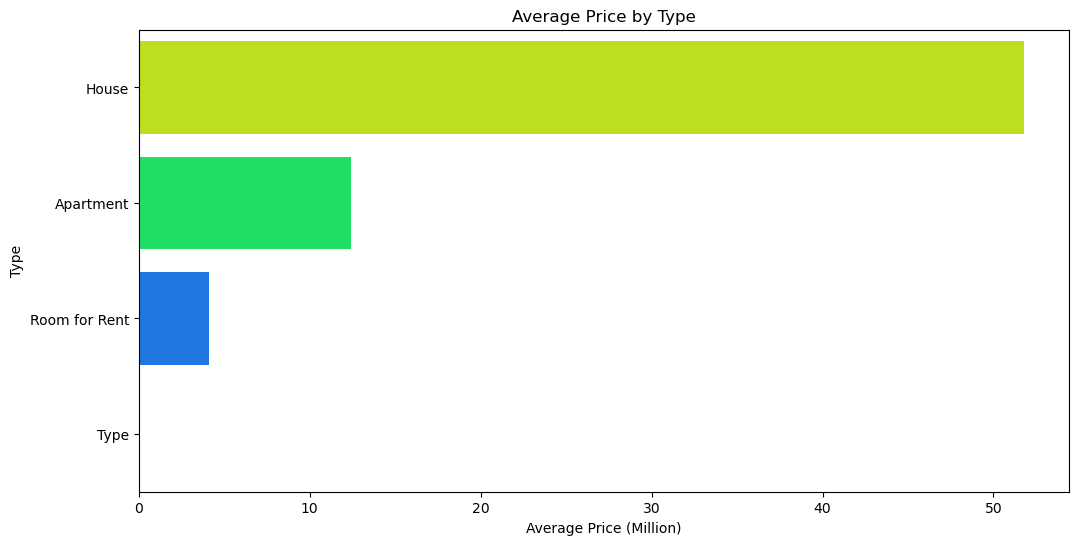

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average price by 'Type'
average_price_by_type = clean_data.groupby('Type')['Price'].mean().reset_index()

# Sort the data by average price in descending order
sorted_data = average_price_by_type.sort_values(by='Price', ascending=False)

# Create a color palette with different colors for each bar
colors = sns.color_palette('hsv', len(sorted_data))

# Create a bar plot with different colors for each bar
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Type', data=sorted_data, palette=colors)
plt.title('Average Price by Type')
plt.xlabel('Average Price (Million)')
plt.ylabel('Type')
plt.show()

## VIOLIN AND BAR CHART SHOWING THE DOMANT DISTRIBUTION OF “PRICE,” “AREA,” “BEDROOMS,” AND ”BATHROOM

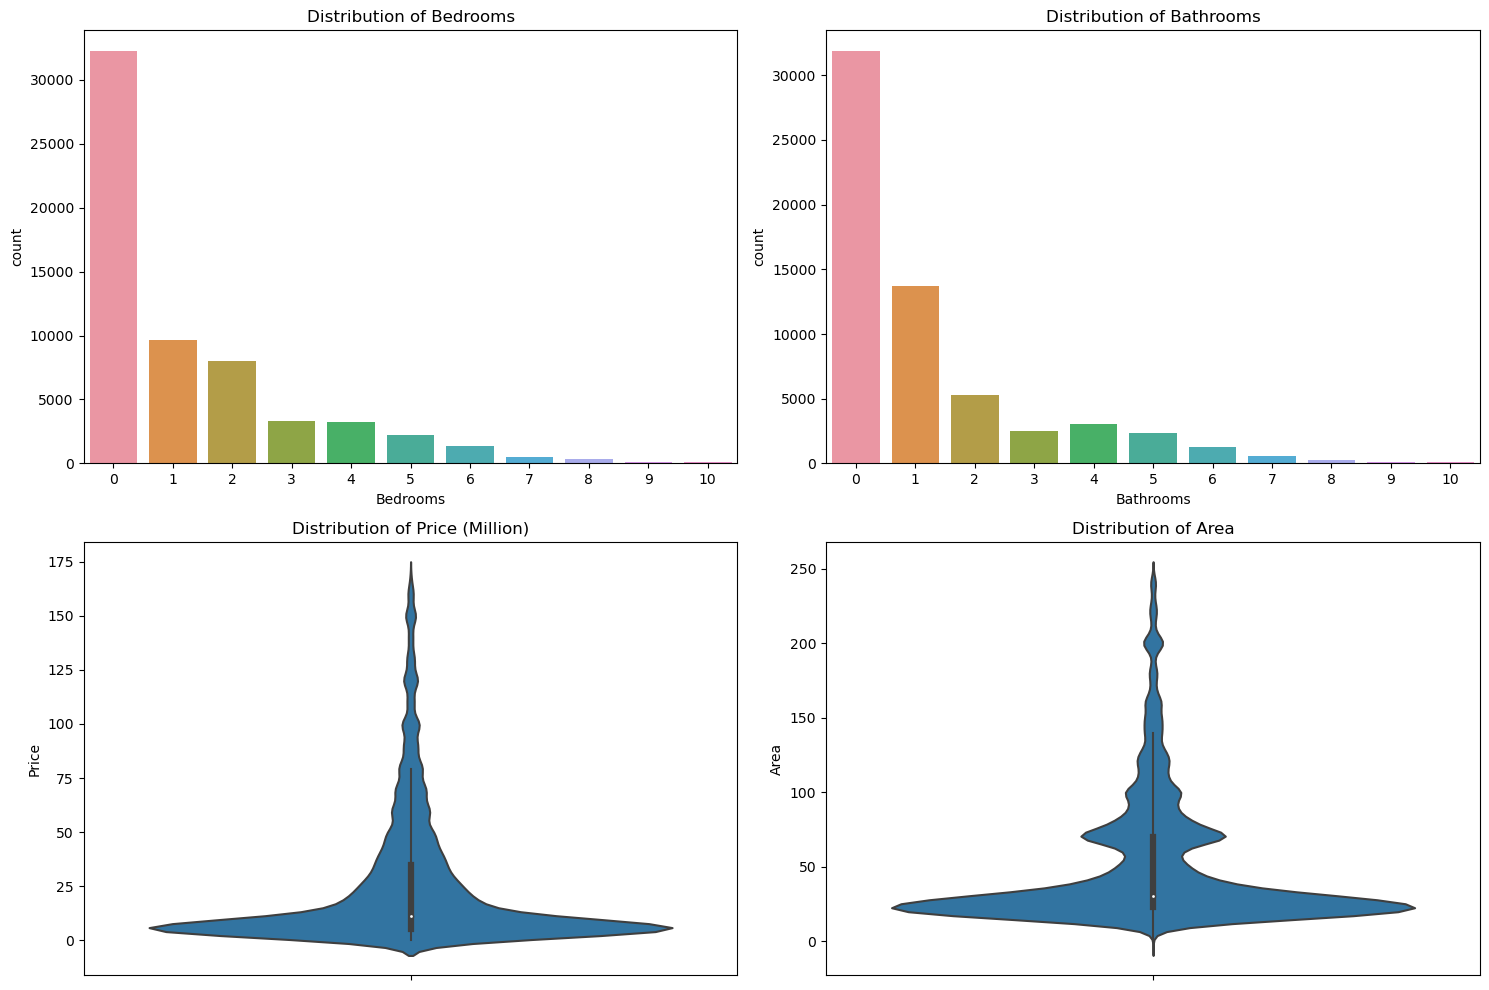

In [25]:
# Correcting the axes titles for Bedrooms and Bathrooms plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Plotting distribution of 'Bedrooms'
sns.countplot(x='Bedrooms', data=clean_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bedrooms')
# Plotting distribution of 'Bathrooms'
sns.countplot(x='Bathrooms', data=clean_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Bathrooms')
# Violin plot for 'Price'
sns.violinplot(data=clean_data, y='Price', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Price (Million)')
# Violin plot for 'Area'
sns.violinplot(data=clean_data, y='Area', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Area')
# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## COMBINED BAR AND LINE CHART DEPICTING TOTAL AND AVERAGE AREA RENT BY LOCATION

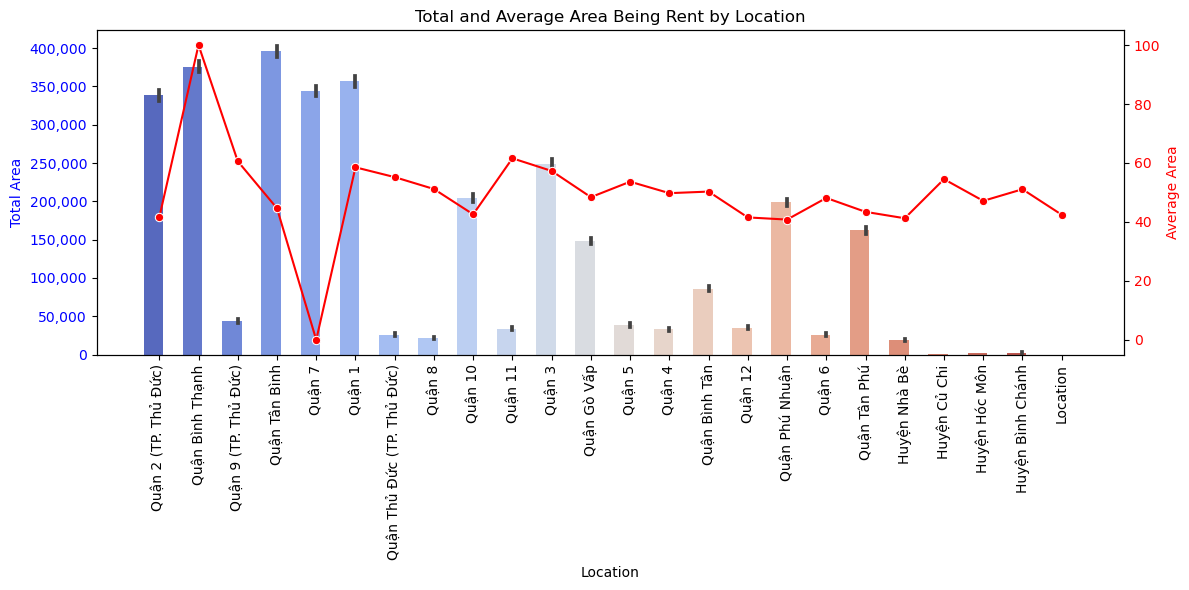

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort data by decreasing area
sorted_data = clean_data.sort_values(by='Area', ascending=False)

# Calculate the mean area for each location
mean_area_by_location = sorted_data.groupby('Location')['Area'].mean().reset_index()

# Create a figure and the first subplot (for average)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define a custom color palette for the bar chart
custom_palette = sns.color_palette("coolwarm", len(sorted_data['Location'].unique()))

# Bar plot for total area (left y-axis)
sns.barplot(x='Location', y='Area', data=sorted_data, estimator=sum, ax=ax1, palette=custom_palette)
ax1.set_xlabel('Location')
ax1.set_ylabel('Total Area', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second subplot (for average)
ax2 = ax1.twinx()

# Line plot for average area (right y-axis)
sns.lineplot(x=mean_area_by_location['Location'], y=mean_area_by_location['Area'], ax=ax2, color='r', marker='o')
ax2.set_ylabel('Average Area', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels for better readability (vertical)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='center')

# Format the left y-axis (total area) to display specific values
def format_y_axis(value, _):
    return f'{int(value):,}'

ax1.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Increase the width of each bar
for bar in ax1.patches:
    bar.set_width(0.5)

# Rotate x-axis labels for better readability (vertical)
plt.title('Total and Average Area Being Rent by Location')
plt.tight_layout()
plt.show()


## COMBINED BAR AND LINE CHART SHOWING TOTAL AND AVERAGE PRICE RENT BY LOCATION

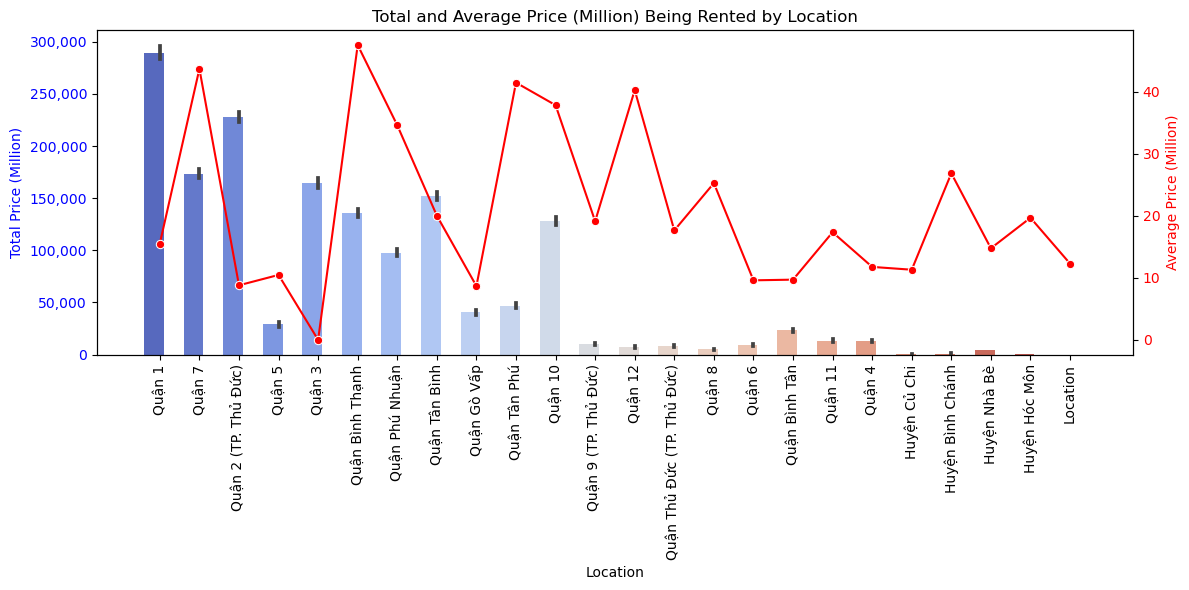

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort data by decreasing price
sorted_data = clean_data.sort_values(by='Price', ascending=False)

# Calculate the mean price for each location
mean_area_by_location = sorted_data.groupby('Location')['Price'].mean().reset_index()

# Create a figure and the first subplot (for average)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define a custom color palette for the bar chart
custom_palette = sns.color_palette("coolwarm", len(sorted_data['Location'].unique()))

# Bar plot for total price (left y-axis)
sns.barplot(x='Location', y='Price', data=sorted_data, estimator=sum, ax=ax1, palette=custom_palette)
ax1.set_xlabel('Location')
ax1.set_ylabel('Total Price (Million)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second subplot (for average)
ax2 = ax1.twinx()

# Line plot for average price (right y-axis)
sns.lineplot(x=mean_area_by_location['Location'], y=mean_area_by_location['Price'], ax=ax2, color='r', marker='o')
ax2.set_ylabel('Average Price (Million)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels for better readability (vertical)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='center')

# Format the left y-axis (total price) to display specific values
def format_y_axis(value, _):
    return f'{int(value):,}'

ax1.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Increase the width of each bar
for bar in ax1.patches:
    bar.set_width(0.5)

# Title and layout adjustments
plt.title('Total and Average Price (Million) Being Rented by Location')
plt.tight_layout()
plt.show()


## HEATMAP SHOWING THE CORRELATIONS OF DATA FEATURES FOR MACHINE LEARNING PURPOSES

In [28]:
from sklearn.preprocessing import LabelEncoder
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()
# Use LabelEncoder to convert 'Type' column to numeric
clean_data['Type_encoded'] = label_encoder.fit_transform(clean_data['Type'])
clean_data['Location_encoded'] = label_encoder.fit_transform(clean_data['Location'])
clean_data[['Type','Type_encoded','Location','Location_encoded']]

,Type,Type_encoded,Location,Location_encoded
0,House,1,Huyện Nhà Bè,3
1,House,1,Quận 2 (TP. Thủ Đức),9
2,House,1,Quận 2 (TP. Thủ Đức),9
3,House,1,Quận 2 (TP. Thủ Đức),9
4,House,1,Quận 2 (TP. Thủ Đức),9
...,...,...,...,...
61172,Apartment,0,Quận 7,14
61173,Apartment,0,Quận 3,10
61174,Apartment,0,Quận Bình Thạnh,17
61175,Apartment,0,Quận 2 (TP. Thủ Đức),9


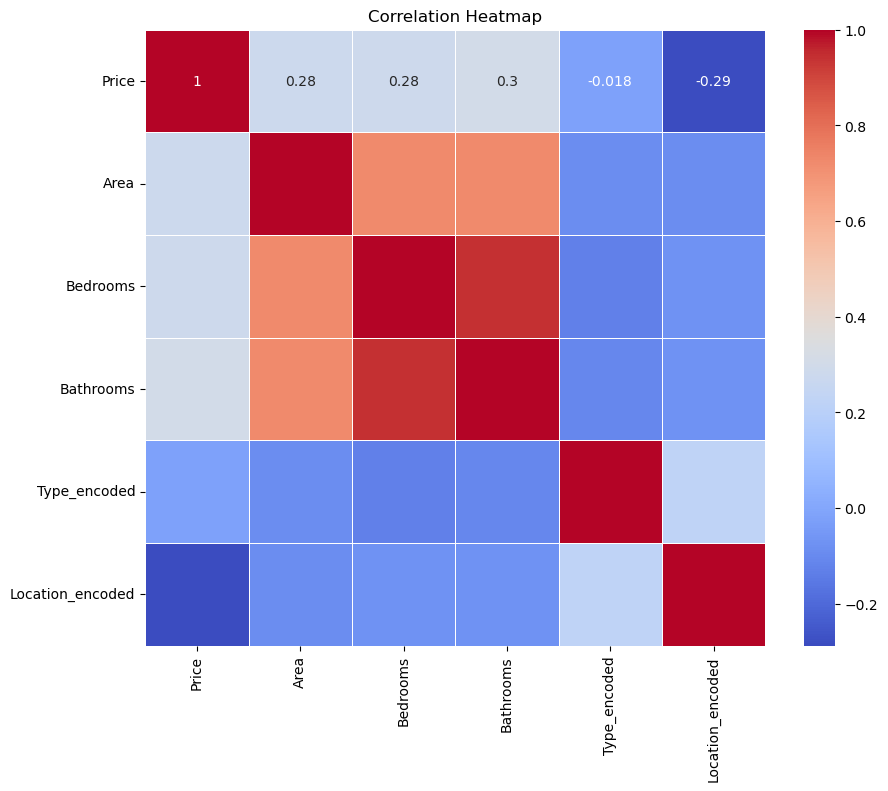

In [29]:
# Select only numeric columns
numeric_columns = clean_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# USING MACHINE LEARNING AND STANDARD ECONOMETRIC METHOD TO ANALYSIS

## COMPARE TWO MODELS LINEAR REGRESSION AND RANDOMFOREST TO PREDICT HOUSE PRICES BASED ON ‘AREA’, ‘BEDROOMS’, ‘BATHROOMS’


### LINEAR REGRESSION

In [30]:
"""import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score"""

'import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score'

In [31]:
"""# Select input variables (features) - remove 'Location' and 'Type' variables
X = clean_data[['Area', 'Bedrooms', 'Bathrooms']] 
# Remove 'Location' and'Type' from the list of input variables
# Select target variable (target)
y = clean_data['Price']"""

"# Select input variables (features) - remove 'Location' and 'Type' variables\nX = clean_data[['Area', 'Bedrooms', 'Bathrooms']] \n# Remove 'Location' and'Type' from the list of input variables\n# Select target variable (target)\ny = clean_data['Price']"

In [32]:
"""# Split data into training set and test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)"""

'# Split data into training set and test set (80% training, 20% testing)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)'

In [33]:
"""from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on the training set
linear_regression_model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = linear_regression_model.predict(X_test)

# Evaluate the model using metrics such as RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Use squared=False to get RMSE
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')"""


"from sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score\n\n# Create a Linear Regression model\nlinear_regression_model = LinearRegression()\n\n# Train the model on the training set\nlinear_regression_model.fit(X_train, y_train)\n\n# Predict house prices on the test set\ny_pred = linear_regression_model.predict(X_test)\n\n# Evaluate the model using metrics such as RMSE and R-squared\nrmse = mean_squared_error(y_test, y_pred, squared=False)  # Use squared=False to get RMSE\nr2 = r2_score(y_test, y_pred)\n\nprint(f'Root Mean Squared Error (RMSE): {rmse}')\nprint(f'R-squared: {r2}')"

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Giả sử clean_data là DataFrame đã được làm sạch
clean_data = pd.read_csv('cleaned_data.csv')

# Chọn các đặc trưng (features) - bỏ các biến 'Location' và 'Type'
X = clean_data[['Area', 'Bedrooms', 'Bathrooms']]

# Chọn biến mục tiêu (target)
y = clean_data['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kích thước của X = X_train + X_test
print("Size of X:", X.shape)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

# Tạo mô hình hồi quy tuyến tính
linear_regression_model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
linear_regression_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred = linear_regression_model.predict(X_test)

# Tạo DataFrame với các giá trị thực tế, giá trị dự đoán, 'Type', 'Time', 'Bedrooms', 'Bathrooms', và 'Area'
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Type': clean_data.loc[X_test.index, 'Type'].values,
    'Time': clean_data.loc[X_test.index, 'Time'].values,
    'Bedrooms': X_test['Bedrooms'].values,
    'Bathrooms': X_test['Bathrooms'].values,
    'Area': X_test['Area'].values
})

# In kích thước của X_test
print("Size of X_test:", X_test.shape)

# In DataFrame chứa giá trị thực tế, giá trị dự đoán, 'Type', 'Time', 'Bedrooms', 'Bathrooms', và 'Area'
print(results_df)

# Đánh giá mô hình bằng các chỉ số như RMSE và R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE) for Linear Regression on Test Data:", rmse)
print("R-squared (R2) for Linear Regression on Test Data:", r2)


Size of X: (61177, 3)
Size of X_train: (48941, 3)
Size of X_test: (12236, 3)
Size of X_test: (12236, 3)
       Actual Price  Predicted Price           Type        Time  Bedrooms  \
45387          45.0        18.667488          House  16/05/2024         0   
56428           5.8        18.980181      Apartment  30/05/2024         0   
50582          26.0        19.188643          House  09/01/2024         0   
16618           5.8        23.672422      Apartment  31/05/2024         1   
14711          13.0        23.672422      Apartment  31/05/2024         1   
...             ...              ...            ...         ...       ...   
2372          100.0        18.459026          House  31/05/2024         0   
11321          39.0        19.501336          House  23/11/2023         0   
16286           6.2        33.574363      Apartment  31/05/2024         1   
30602           3.4        18.250564  Room for Rent  16/05/2024         0   
33253           7.2        25.758700  Room for Re

### RANDOM FOREST

In [35]:
"""import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt"""

'import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.tree import plot_tree\nimport matplotlib.pyplot as plt'

In [36]:
"""# Select input variables (features)
X = clean_data[[ 'Area', 'Bedrooms', 'Bathrooms']] 
# Select the input variables to use
# Select target variable (target)
y = clean_data['Price']
# Split data into training set and test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)"""

"# Select input variables (features)\nX = clean_data[[ 'Area', 'Bedrooms', 'Bathrooms']] \n# Select the input variables to use\n# Select target variable (target)\ny = clean_data['Price']\n# Split data into training set and test set (80% training, 20% testing)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)"

In [37]:
"""# Create Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Can adjust the number of trees (n_estimators) according to needs"""

'# Create Random Forest model\nrandom_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)\n# Can adjust the number of trees (n_estimators) according to needs'

In [38]:
"""# Train the model on the training set
random_forest_model.fit(X_train, y_train)
# Predict house prices on the test set
y_pred = random_forest_model.predict(X_test)
# Evaluate the model using metrics such as RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)"""

'# Train the model on the training set\nrandom_forest_model.fit(X_train, y_train)\n# Predict house prices on the test set\ny_pred = random_forest_model.predict(X_test)\n# Evaluate the model using metrics such as RMSE and R-squared\nrmse = mean_squared_error(y_test, y_pred, squared=False)\nr2 = r2_score(y_test, y_pred)'

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Giả sử clean_data là DataFrame đã được làm sạch
clean_data = pd.read_csv('cleaned_data.csv')

# Chọn các đặc trưng (features)
X = clean_data[['Area', 'Bedrooms', 'Bathrooms']]

# Chọn biến mục tiêu (target)
y = clean_data['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kích thước của X = X_train + X_test
print("Size of X:", X.shape)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

# Tạo mô hình Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
random_forest_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred = random_forest_model.predict(X_test)

# Tạo DataFrame với các giá trị thực tế, giá trị dự đoán, 'Type', 'Time', 'Bedrooms', 'Bathrooms', và 'Area'
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Type': clean_data.loc[X_test.index, 'Type'].values,
    'Time': clean_data.loc[X_test.index, 'Time'].values,
    'Bedrooms': X_test['Bedrooms'].values,
    'Bathrooms': X_test['Bathrooms'].values,
    'Area': X_test['Area'].values
})

# In kích thước của X_test
print("Size of X_test:", X_test.shape)

# In DataFrame chứa giá trị thực tế, giá trị dự đoán, 'Type', 'Time', 'Bedrooms', 'Bathrooms', và 'Area'
print(results_df)

# Đánh giá mô hình bằng các chỉ số như RMSE và R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE) for RandomForest on Test Data:", rmse)
print("R-squared (R2) for RandomForest on Test Data:", r2)



Size of X: (61177, 3)
Size of X_train: (48941, 3)
Size of X_test: (12236, 3)
Size of X_test: (12236, 3)
       Actual Price  Predicted Price           Type        Time  Bedrooms  \
45387          45.0        24.665156          House  16/05/2024         0   
56428           5.8        26.715727      Apartment  30/05/2024         0   
50582          26.0        20.780953          House  09/01/2024         0   
16618           5.8        12.103276      Apartment  31/05/2024         1   
14711          13.0        12.103276      Apartment  31/05/2024         1   
...             ...              ...            ...         ...       ...   
2372          100.0        25.535401          House  31/05/2024         0   
11321          39.0        24.896857          House  23/11/2023         0   
16286           6.2        45.054515      Apartment  31/05/2024         1   
30602           3.4         4.091493  Room for Rent  16/05/2024         0   
33253           7.2        26.916695  Room for Re

## COMPARE TWO MODELS MA AND RANDOMFOREST TO PREDICT HOUSE PRICES BASED ON ‘TIME’


### MOVING AVERAGE (MA)


In [40]:
"""import numpy as np
# Sort data by time column (Time)
ma_data = clean_data.sort_values(by='Time')
# Select column 'Price' as input data
price_data = ma_data['Price']"""


"import numpy as np\n# Sort data by time column (Time)\nma_data = clean_data.sort_values(by='Time')\n# Select column 'Price' as input data\nprice_data = ma_data['Price']"

In [41]:
"""# Use 5-day MA to predict value
ma_period = 5
ma_data['MA'] = price_data.rolling(window=ma_period).mean()
# Remove lines with NaN values (because the original MA cannot be calculated)
ma_data = ma_data.dropna()"""

"# Use 5-day MA to predict value\nma_period = 5\nma_data['MA'] = price_data.rolling(window=ma_period).mean()\n# Remove lines with NaN values (because the original MA cannot be calculated)\nma_data = ma_data.dropna()"

In [42]:
"""# Create training set and prediction set (test)
train_size = int(0.8 * len(ma_data)) 
# Use 80% of the data for training set
train_data = ma_data.iloc[:train_size]
test_data = ma_data.iloc[train_size:]
# Size of X = X_train + X_test
print("Size of train_data:", train_data.shape)
print("Size of test_data:", test_data.shape)"""

'# Create training set and prediction set (test)\ntrain_size = int(0.8 * len(ma_data)) \n# Use 80% of the data for training set\ntrain_data = ma_data.iloc[:train_size]\ntest_data = ma_data.iloc[train_size:]\n# Size of X = X_train + X_test\nprint("Size of train_data:", train_data.shape)\nprint("Size of test_data:", test_data.shape)'

In [43]:
"""# Select the actual value on the prediction set
actual_values = test_data['Price']
# Select the predicted value from column 'MA' on the prediction set
predicted_values = test_data['MA']
# Calculate MSE and RMSE
mse = np.mean((actual_values - predicted_values) ** 2)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE) for MA on Test Data:", mse)
print("Root Mean Squared Error (RMSE) for MA on Test Data:", rmse)"""

'# Select the actual value on the prediction set\nactual_values = test_data[\'Price\']\n# Select the predicted value from column \'MA\' on the prediction set\npredicted_values = test_data[\'MA\']\n# Calculate MSE and RMSE\nmse = np.mean((actual_values - predicted_values) ** 2)\nrmse = np.sqrt(mse)\nprint("Mean Squared Error (MSE) for MA on Test Data:", mse)\nprint("Root Mean Squared Error (RMSE) for MA on Test Data:", rmse)'

In [49]:
#With the MA model, the data used is just the Price column, sorted by Time for prediction
# Price làm giá trị dự đoán, Time là giá trị
import numpy as np
# Sort data by time column (Time)
ma_data = clean_data.sort_values(by='Time')
# Select column 'Price' as input data
price_data = ma_data['Price']
# Use 5-day MA to predict value
ma_period = 5
ma_data['MA'] = price_data.rolling(window=ma_period).mean()
# Remove lines with NaN values (because the original MA cannot be calculated)
ma_data = ma_data.dropna()
# Create training set and prediction set (test)
train_size = int(0.8 * len(ma_data)) # Use 80% of the data for training set
train_data = ma_data.iloc[:train_size]
test_data = ma_data.iloc[train_size:]
# Size of X = X_train + X_test
print("Size of train_data:", train_data.shape)
print("Size of test_data:", test_data.shape)
# Select the actual value on the prediction set
actual_values = test_data['Price']
# Select the predicted value from column 'MA' on the prediction set
predicted_values = test_data['MA']
# Create a DataFrame with actual values, predicted values, 'Type', 'Time'
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred,'Type': clean_data.loc[X_test.index, 'Type'].values, 
                               'Time': clean_data.loc[X_test.index, 'Time'].values})
# Print the size of X_test
print("Size of X_test:", X_test.shape)
# Print the DataFrame containing actual values, predicted values, 'Type', 'Time'
print(results_df)
# Calculate MSE and RMSE
mse = np.mean((actual_values - predicted_values) ** 2)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE) for MA on Test Data:", mse)
print("Root Mean Squared Error (RMSE) for MA on Test Data:", rmse)

Size of train_data: (48938, 9)
Size of test_data: (12235, 9)
Size of X_test: (12236, 3)
       Actual Price  Predicted Price           Type        Time
45387          45.0        24.665156          House  16/05/2024
56428           5.8        26.715727      Apartment  30/05/2024
50582          26.0        20.780953          House  09/01/2024
16618           5.8        12.103276      Apartment  31/05/2024
14711          13.0        12.103276      Apartment  31/05/2024
...             ...              ...            ...         ...
2372          100.0        25.535401          House  31/05/2024
11321          39.0        24.896857          House  23/11/2023
16286           6.2        45.054515      Apartment  31/05/2024
30602           3.4         4.091493  Room for Rent  16/05/2024
33253           7.2        26.916695  Room for Rent  17/04/2024

[12236 rows x 4 columns]
Mean Squared Error (MSE) for MA on Test Data: 374.3638271086555
Root Mean Squared Error (RMSE) for MA on Test Data: 19

### RANDOM FOREST

In [45]:
"""from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Sort data by time column (Time)
rf = clean_data.sort_values(by='Time')
# Convert time value to integer
rf['Time'] = pd.to_datetime(rf['Time'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
# Select column 'Price' as the dependent variable (target) and independent variables (features)
X = rf[['Time']] 
# Add independent variables to use
y = rf['Price']
# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Kích thước của X = X_train + X_test
print("Size of X:", X.shape)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)"""

'from sklearn.ensemble import RandomForestRegressor\nimport numpy as np\n# Sort data by time column (Time)\nrf = clean_data.sort_values(by=\'Time\')\n# Convert time value to integer\nrf[\'Time\'] = pd.to_datetime(rf[\'Time\'], format=\'%d/%m/%Y\').dt.strftime(\'%Y%m%d\')\n# Select column \'Price\' as the dependent variable (target) and independent variables (features)\nX = rf[[\'Time\']] \n# Add independent variables to use\ny = rf[\'Price\']\n# Divide the data set into training set and test set\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n# Kích thước của X = X_train + X_test\nprint("Size of X:", X.shape)\nprint("Size of X_train:", X_train.shape)\nprint("Size of X_test:", X_test.shape)'

In [46]:
"""# Create Random Forest model
random_forest_time_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the random_forest_time_model on the training set
random_forest_time_model.fit(X_train, y_train)
# Predict the price on the test set
y_pred = random_forest_time_model.predict(X_test)
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE) for Random Forest on Test Data:", mse)
print("Root Mean Squared Error (RMSE) for Random Forest on Test Data:", rmse)"""

'# Create Random Forest model\nrandom_forest_time_model = RandomForestRegressor(n_estimators=100, random_state=42)\n# Train the random_forest_time_model on the training set\nrandom_forest_time_model.fit(X_train, y_train)\n# Predict the price on the test set\ny_pred = random_forest_time_model.predict(X_test)\n# Calculate MSE and RMSE\nmse = mean_squared_error(y_test, y_pred)\nrmse = np.sqrt(mse)\nprint("Mean Squared Error (MSE) for Random Forest on Test Data:", mse)\nprint("Root Mean Squared Error (RMSE) for Random Forest on Test Data:", rmse)'

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Giả sử clean_data là DataFrame đã được làm sạch
clean_data = pd.read_csv('cleaned_data.csv')

# Kiểm tra định dạng ban đầu của cột Time
print(clean_data['Time'].head())

# Sắp xếp dữ liệu theo cột thời gian (Time)
rf = clean_data.sort_values(by='Time')

# Chuyển đổi giá trị thời gian thành định dạng datetime
rf['Time'] = pd.to_datetime(rf['Time'], format='%d/%m/%Y', errors='coerce')

# Kiểm tra các giá trị NaT (nếu có)
print(rf[rf['Time'].isna()])

# Loại bỏ các hàng có giá trị NaT trong cột Time sau khi chuyển đổi
rf = rf.dropna(subset=['Time'])

# Chuyển đổi cột Time sang định dạng số nguyên YYYYMMDD
rf['Time'] = rf['Time'].dt.strftime('%Y%m%d').astype(int)

# Chọn cột 'Price' làm biến phụ thuộc (target) và các biến độc lập (features)
X = rf[['Time']]  # Thêm các biến độc lập cần sử dụng
y = rf['Price']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kích thước của X = X_train + X_test
print("Size of X:", X.shape)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

# Tạo mô hình Random Forest
random_forest_time_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
random_forest_time_model.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred = random_forest_time_model.predict(X_test)

# Tạo DataFrame với các giá trị thực tế, giá trị dự đoán, 'Type', 'Time'
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Type': clean_data.loc[X_test.index, 'Type'].values,
    'Time': clean_data.loc[X_test.index, 'Time'].values
})

# In kích thước của X_test
print("Size of X_test:", X_test.shape)

# In DataFrame chứa giá trị thực tế, giá trị dự đoán, 'Type', 'Time'
print(results_df)

# Tính toán MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE) for Random Forest on Test Data:", mse)
print("Root Mean Squared Error (RMSE) for Random Forest on Test Data:", rmse)


0    31/05/2024
1    31/05/2024
2    31/05/2024
3    31/05/2024
4    31/05/2024
Name: Time, dtype: object
       Type  Room Name  Price  Location Time  Area  Bedrooms  Bathrooms
41824  Type  Room Name    0.0  Location  NaT     0         0          0
Size of X: (61176, 1)
Size of X_train: (48940, 1)
Size of X_test: (12236, 1)
Size of X_test: (12236, 1)
       Actual Price  Predicted Price           Type        Time
10820         100.0        33.058782          House  07/12/2023
25186           8.5        16.846740      Apartment  30/05/2024
6628          135.0        37.997690          House  06/03/2024
46764          82.0        33.359202          House  24/04/2024
59556          23.0        16.846740      Apartment  30/05/2024
...             ...              ...            ...         ...
12006          50.0        23.993547          House  12/11/2023
34811           6.0        19.549573  Room for Rent  09/03/2024
32854           1.7        29.146733  Room for Rent  22/04/2024
32540 

#### RANDOM FOREST MODEL

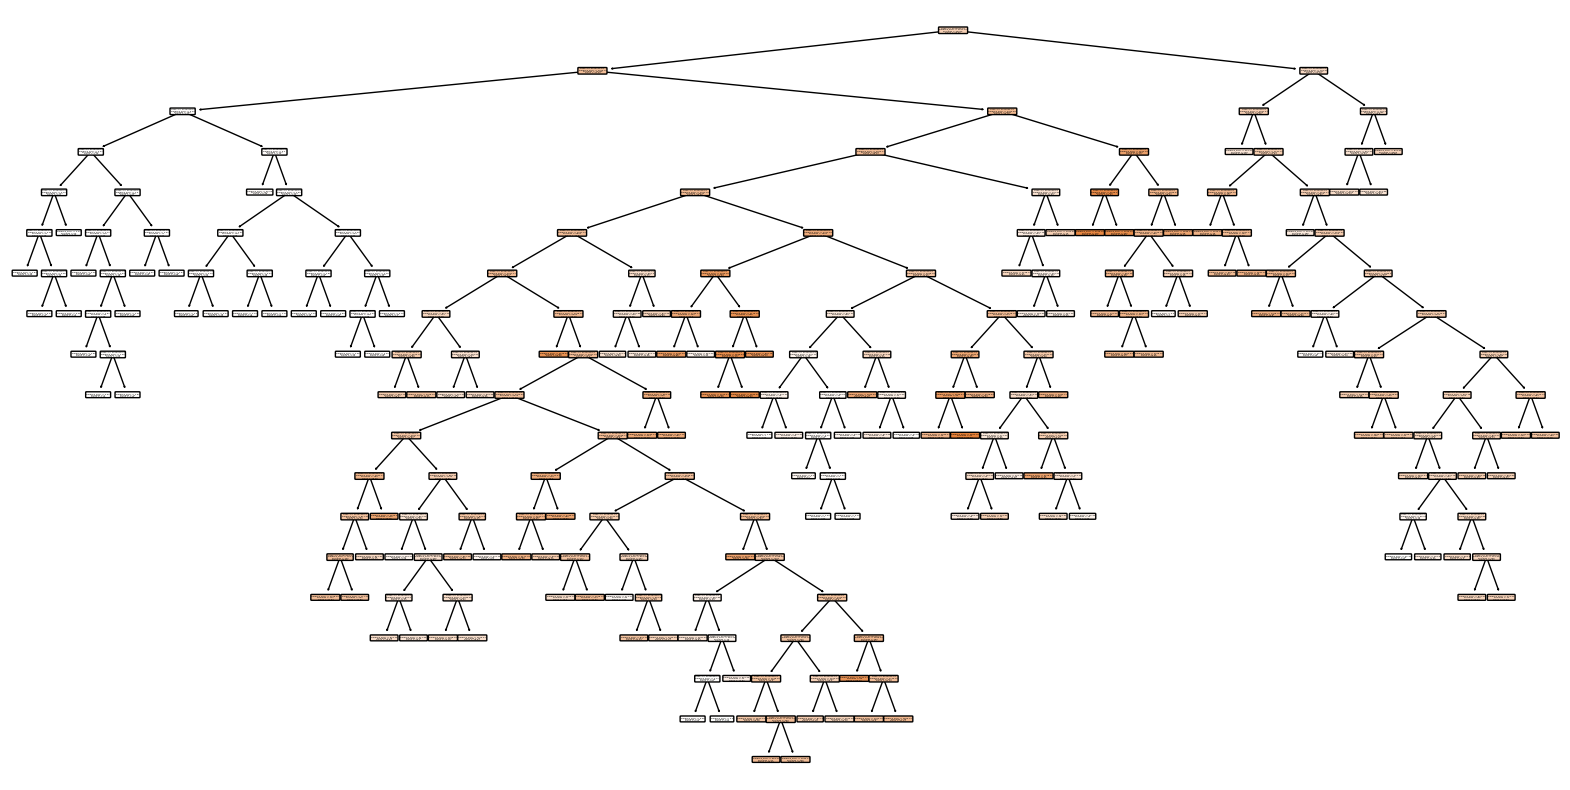

In [59]:
# Select a tree from the forest (e.g. first tree)
chosen_tree = random_forest_time_model.estimators_[0]
# Draw a decision tree
plt.figure(figsize=(20,10)) # Set the size for the figure
plot_tree(chosen_tree,
filled=True,
feature_names=X.columns,
rounded=True,
proportion=False,
precision=2)
plt.show()
